<a href="https://colab.research.google.com/github/643021273-8/python-_dataviz2023/blob/main/Project1_66_Group_tawan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Analytics

<img src="https://www.datanami.com/wp-content/uploads/2014/06/text-analytics.png" width="300">

## Due Date: Sunday, October 1, 2023
<br>
<span style="color:red">NOTE: There are always last minute issues submitting the case studies. DO NOT WAIT UNTIL THE LAST MINUTE!</span>

## List team members:

1. Tawan       643020501-6 Tawan.b@kkumail.com
2. Punnita Thongbor    643020508-2 Punnita.t@kkumail.com
3. Puttipong   643021268-1 Puttipongyy@kkumail.com
4. Satawat     643021273-8 Satawat.m@kkumail.com
5. Jindaporn Phopomee  643021262-3 Jindaporn.p@kkumail.com

**NOTE1**: Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost

**NOTE2**: Create a slide presentation once finished, convert to pdf format, and turn in by one group member only
<br>A list of documents to turn in: 1) Jupyter notebook containing results and 2) A set of slides in pdf format

In [ ]:
# Load these libraries
import json
import pprint
import pandas as pd
from io import StringIO # using StringIO to prevent ValueError
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import urllib.request

import matplotlib.pyplot as plt
%matplotlib inline

## Problem 1: Working with Twitter Data and JSON file

We are working with a Twitter dataset in JSON format from `thailand_tweets.txt`.<br>
The tweets were scraped using "Thailand" keyword on August 31, 2022.<br>
We are going to examine the dataset and retrieve information from the JSON file.
Most Twitter datasets provide only Tweet ID where we can retrieve tweets from tweet ID as follow.
```
twitter.com/anyuser/status/<tweet_id>
```

#### Read JSON file

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read the file
file = open('/content/drive/MyDrive/DataForBig/thailand_tweets.txt','r') # rename
foo = file.read()
d = json.loads(foo)



In [ ]:
thailand_json = json.loads(d)
thailand_json

{'1564764893038882816': {'tweet_id': '1564764893038882816',
  'username': 'matthunter',
  'name': 'MATT HUNTΞR',
  'profile_picture': 'https://twitter.com/matthunter/photo',
  'replies': 2,
  'retweets': 1,
  'likes': 7,
  'is_retweet': False,
  'posted_time': '2022-08-30T23:59:57+00:00',
  'content': 'Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. ',
  'hashtags': [],
  'mentions': [],
  'images': [],
  'videos': [],
  'tweet_url': 'https://twitter.com/matthunter/status/1564764893038882816',
  'link': ''},
 '1564764866598080513': {'tweet_id': '1564764866598080513',
  'username': 'DavSmithVP',
  'name': 'DavSmith / Virtual Photography',
  'profile_picture': 'https://twitter.com/DavSmithVP/photo',
  'replies': 0,
  'retweets': 0,
  'likes': 2,
  'is_retweet': False,
  'posted_time': '2022-08-30T23:59:50+00:00',
  'content': 'Tomb Raider Underworld | Thailand \n#VirtualPhotography \n@tombraider\n @crystaldynamics',
  'hashtags': ['Virtua

In [ ]:
# inspect the file
thailand_json

{'1564764893038882816': {'tweet_id': '1564764893038882816',
  'username': 'matthunter',
  'name': 'MATT HUNTΞR',
  'profile_picture': 'https://twitter.com/matthunter/photo',
  'replies': 2,
  'retweets': 1,
  'likes': 7,
  'is_retweet': False,
  'posted_time': '2022-08-30T23:59:57+00:00',
  'content': 'Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. ',
  'hashtags': [],
  'mentions': [],
  'images': [],
  'videos': [],
  'tweet_url': 'https://twitter.com/matthunter/status/1564764893038882816',
  'link': ''},
 '1564764866598080513': {'tweet_id': '1564764866598080513',
  'username': 'DavSmithVP',
  'name': 'DavSmith / Virtual Photography',
  'profile_picture': 'https://twitter.com/DavSmithVP/photo',
  'replies': 0,
  'retweets': 0,
  'likes': 2,
  'is_retweet': False,
  'posted_time': '2022-08-30T23:59:50+00:00',
  'content': 'Tomb Raider Underworld | Thailand \n#VirtualPhotography \n@tombraider\n @crystaldynamics',
  'hashtags': ['Virtua

#### Pretty print json/dict object

In [ ]:
import pprint
pprint.pprint(thailand_json)

{'1564761905410875392': {'content': 'Tinggal cari duitnya aja ini mah kalo di '
                                    'Thailand bisa pake Qris',
                         'hashtags': [],
                         'images': [],
                         'is_retweet': False,
                         'likes': 0,
                         'link': '',
                         'mentions': [],
                         'name': '',
                         'posted_time': '2022-08-30T23:48:04+00:00',
                         'profile_picture': 'https://twitter.com/moanfIeur/photo',
                         'replies': 0,
                         'retweets': 0,
                         'tweet_id': '1564761905410875392',
                         'tweet_url': 'https://twitter.com/moanfIeur/status/1564761905410875392',
                         'username': 'moanfIeur',
                         'videos': []},
 '1564761944061382656': {'content': 'Padahal berharap pertama lawan Thailand '
                     

ทดสอบอื่นๆ

In [ ]:
thailand_json.keys()

dict_keys(['1564764893038882816', '1564764866598080513', '1564764845685280772', '1564764710804897792', '1564764468277612549', '1564764445825458181', '1564764361742110720', '1564764274098323456', '1564764028014313472', '1564763907700531202', '1564763775403712513', '1564763746463105026', '1564763729967054848', '1564763679232405504', '1564763673662464003', '1564763553130655744', '1564763407818952705', '1564763389058027521', '1564763303989366784', '1564763292354355200', '1564763185244426240', '1564763141589897217', '1564763050477244417', '1564762341324992513', '1564762335192940544', '1564762170277052418', '1564762027507458049', '1564761944061382656', '1564761905410875392'])

In [ ]:
first_key = list(thailand_json.keys())[0]
thailand_json[first_key]

{'tweet_id': '1564764893038882816',
 'username': 'matthunter',
 'name': 'MATT HUNTΞR',
 'profile_picture': 'https://twitter.com/matthunter/photo',
 'replies': 2,
 'retweets': 1,
 'likes': 7,
 'is_retweet': False,
 'posted_time': '2022-08-30T23:59:57+00:00',
 'content': 'Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. ',
 'hashtags': [],
 'mentions': [],
 'images': [],
 'videos': [],
 'tweet_url': 'https://twitter.com/matthunter/status/1564764893038882816',
 'link': ''}

Possible approaches:
* In fact, `pandas` has `pandas.read_json(<file_dir>)` function to read json file into dataframe
* As we create a data dict, we can also read our data dict into a pandas dataframe

In [ ]:
import pandas as pd
from io import StringIO

In [ ]:
thailand_df = pd.read_json(StringIO(d), orient='index')

In [ ]:
thailand_df.head()

,tweet_id,username,name,profile_picture,replies,retweets,likes,is_retweet,posted_time,content,hashtags,mentions,images,videos,tweet_url,link
2019-08-02 16:54:53.038882816,1564764893038882816,matthunter,MATT HUNTΞR,https://twitter.com/matthunter/photo,2,1,7,False,2022-08-30 23:59:57+00:00,"Thanks for asking! Yes, we will support shippi...",[],[],[],[],https://twitter.com/matthunter/status/15647648...,
2019-08-02 16:54:26.598080513,1564764866598080512,DavSmithVP,DavSmith / Virtual Photography,https://twitter.com/DavSmithVP/photo,0,0,2,False,2022-08-30 23:59:50+00:00,Tomb Raider Underworld | Thailand \n#VirtualPh...,[VirtualPhotography],"[tombraider, crystaldynamics]",[https://pbs.twimg.com/media/FbcpF-FXkAIlqTS?f...,[],https://twitter.com/DavSmithVP/status/15647648...,
2019-08-02 16:54:05.685280772,1564764845685280768,DailyPattaya,The Pattaya Daily,https://twitter.com/DailyPattaya/photo,0,0,0,False,2022-08-30 23:59:45+00:00,The latest The Pattaya Daily! http://thepattay...,"[thailand, pattaya]","[PopeKael, ASEANNOWTH]",[],[],https://twitter.com/DailyPattaya/status/156476...,
2019-08-02 16:51:50.804897792,1564764710804897792,Bryan62766077,Bryan,https://twitter.com/Bryan62766077/photo,1,0,1,False,2022-08-30 23:59:13+00:00,"You can live some places for next to nothing, ...",[],[],[],[],https://twitter.com/Bryan62766077/status/15647...,
2019-08-02 16:47:48.277612549,1564764468277612544,Megan_and_Grrr,Megan,https://twitter.com/Megan_and_Grrr/photo,0,0,0,False,2022-08-30 23:58:15+00:00,"ALIEN HOUSE is a story of love, hope and alien...","[fantasy, extraterrestrial]",[],[https://pbs.twimg.com/media/Fbco_bSXEAMcDOZ?f...,[],https://twitter.com/Megan_and_Grrr/status/1564...,


### Your report
* The total number of tweets collected in the file:
* The content of the first tweet:
* Is the first tweet contained any hashtags or mentions?
* Collect all hashtags related to Thailand from this data
* Find the most popular tweets in your collection of tweets, i.e. the tweets with the largest number of retweet/replies/likes counts
    * You are free to define your own popularity metric
* Display the top 5 tweets that are the most popular among your collection
* Create a word cloud of words in the contents; however, we note that this word cloud is not a good representation of Thailand as the data size is small

In [ ]:
th_df = thailand_df.set_index([pd.Index(range(29))])

In [ ]:
th_df

,tweet_id,username,name,profile_picture,replies,retweets,likes,is_retweet,posted_time,content,hashtags,mentions,images,videos,tweet_url,link
0,1564764893038882816,matthunter,MATT HUNTΞR,https://twitter.com/matthunter/photo,2,1,7,False,2022-08-30 23:59:57+00:00,"Thanks for asking! Yes, we will support shippi...",[],[],[],[],https://twitter.com/matthunter/status/15647648...,
1,1564764866598080512,DavSmithVP,DavSmith / Virtual Photography,https://twitter.com/DavSmithVP/photo,0,0,2,False,2022-08-30 23:59:50+00:00,Tomb Raider Underworld | Thailand \n#VirtualPh...,[VirtualPhotography],"[tombraider, crystaldynamics]",[https://pbs.twimg.com/media/FbcpF-FXkAIlqTS?f...,[],https://twitter.com/DavSmithVP/status/15647648...,
2,1564764845685280768,DailyPattaya,The Pattaya Daily,https://twitter.com/DailyPattaya/photo,0,0,0,False,2022-08-30 23:59:45+00:00,The latest The Pattaya Daily! http://thepattay...,"[thailand, pattaya]","[PopeKael, ASEANNOWTH]",[],[],https://twitter.com/DailyPattaya/status/156476...,
3,1564764710804897792,Bryan62766077,Bryan,https://twitter.com/Bryan62766077/photo,1,0,1,False,2022-08-30 23:59:13+00:00,"You can live some places for next to nothing, ...",[],[],[],[],https://twitter.com/Bryan62766077/status/15647...,
4,1564764468277612544,Megan_and_Grrr,Megan,https://twitter.com/Megan_and_Grrr/photo,0,0,0,False,2022-08-30 23:58:15+00:00,"ALIEN HOUSE is a story of love, hope and alien...","[fantasy, extraterrestrial]",[],[https://pbs.twimg.com/media/Fbco_bSXEAMcDOZ?f...,[],https://twitter.com/Megan_and_Grrr/status/1564...,
5,1564764445825458176,OhmPawatInter,OhmPawat International,https://twitter.com/OhmPawatInter/photo,0,99,143,False,2022-08-30 23:58:10+00:00,Trend twitter update \n\nTop Twitter influence...,"[4, ohmpawat, ย]",[ohmpawatt],[https://pbs.twimg.com/media/Fbco99jWIAEd3Oe?f...,[],https://twitter.com/OhmPawatInter/status/15647...,
6,1564764361742110720,nato_tonyo11,nutri(BUSY SI ENGR.)| SoliD,https://twitter.com/nato_tonyo11/photo,0,2,18,False,2022-08-30 23:57:50+00:00,Good morning world! And goodmorning to you to...,[DonnyPangilinan],[],[],[],https://twitter.com/nato_tonyo11/status/156476...,
7,1564764274098323456,ThThitikarn61,thiti,https://twitter.com/ThThitikarn61/photo,0,0,0,False,2022-08-30 23:57:29+00:00,Listening to #faraway the title track of #theo...,"[faraway, theotherside, MarkTuan]",[marktuan],[],[],https://twitter.com/ThThitikarn61/status/15647...,
8,1564764028014313472,Livetradingnews,Knightly News,https://twitter.com/Livetradingnews/photo,0,2,3,False,2022-08-30 23:56:30+00:00,With the recent news of the SCB X-Bitkub deal ...,[],[],[],[],https://twitter.com/Livetradingnews/status/156...,
9,1564763907700531200,DiscoverSoc,Discover Society,https://twitter.com/DiscoverSoc/photo,0,1,0,False,2022-08-30 23:56:02+00:00,#ICYMI On the Frontline. Crude Power in Thail...,[ICYMI],[],[],[],https://twitter.com/DiscoverSoc/status/1564763...,https://t.co/OYQzv4BSm9


### 1.1 The total number of tweets collected in the file:

In [ ]:
thailand_df.shape

(29, 16)

### 1.2 The content of the first tweet:

In [ ]:
content = th_df.iloc[:1, 9:10]

In [ ]:
print(content.loc[0, 'content'])

Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. 


In [ ]:
thailand_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29 entries, 2019-08-02 16:54:53.038882816 to 2019-08-02 16:05:05.410875392
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   tweet_id         29 non-null     int64              
 1   username         29 non-null     object             
 2   name             29 non-null     object             
 3   profile_picture  29 non-null     object             
 4   replies          29 non-null     int64              
 5   retweets         29 non-null     int64              
 6   likes            29 non-null     int64              
 7   is_retweet       29 non-null     bool               
 8   posted_time      29 non-null     datetime64[ns, UTC]
 9   content          29 non-null     object             
 10  hashtags         29 non-null     object             
 11  mentions         29 non-null     object             
 12  images           29 no

### 1.3 Is the first tweet contained any hashtags or mentions?

In [ ]:
ht_mt = th_df.iloc[:1, 10:12]

In [ ]:
print(ht_mt.loc[:2])

  hashtags mentions
0       []       []


### 1.4 Collect all hashtags related to Thailand from this data

In [ ]:
all_hashtag = th_df.iloc[:, 10:11]

In [ ]:
all_hashtag

,hashtags
0,[]
1,[VirtualPhotography]
2,"[thailand, pattaya]"
3,[]
4,"[fantasy, extraterrestrial]"
5,"[4, ohmpawat, ย]"
6,[DonnyPangilinan]
7,"[faraway, theotherside, MarkTuan]"
8,[]
9,[ICYMI]


In [ ]:
all_hashtag

,hashtags
0,[]
1,[VirtualPhotography]
2,"[thailand, pattaya]"
3,[]
4,"[fantasy, extraterrestrial]"
5,"[4, ohmpawat, ย]"
6,[DonnyPangilinan]
7,"[faraway, theotherside, MarkTuan]"
8,[]
9,[ICYMI]


### 1.5 Find the most popular tweets in your collection of tweets, i.e. the tweets with the largest number of retweet/replies/likes counts

    * You are free to define your own popularity metric

pop_score = 0.5

In [ ]:
#pop_score =  4* replies  + 3* retweet + 3* like
score_column = list()
for interaction in th_df.iloc[:, 4:7].iterrows():
  #print(interaction[1])
  #print('-'*50)
  score = interaction[1]['replies'] * 4 + interaction[1]['retweets'] * 3 + interaction[1]['likes'] * 3
  score_column.append(score)

print(score_column)


[32, 6, 0, 7, 0, 726, 60, 0, 15, 3, 0, 0, 129, 7, 0, 25, 0, 0, 4, 40, 46, 9, 3, 266, 7, 0, 4, 0, 0]


In [ ]:
tweet_pop = th_df

In [ ]:
tweet_pop['pop_score'] = score_column

In [ ]:
tweet_pop.head()

,tweet_id,username,name,profile_picture,replies,retweets,likes,is_retweet,posted_time,content,hashtags,mentions,images,videos,tweet_url,link,pop_score
0,1564764893038882816,matthunter,MATT HUNTΞR,https://twitter.com/matthunter/photo,2,1,7,False,2022-08-30 23:59:57+00:00,"Thanks for asking! Yes, we will support shippi...",[],[],[],[],https://twitter.com/matthunter/status/15647648...,,32
1,1564764866598080512,DavSmithVP,DavSmith / Virtual Photography,https://twitter.com/DavSmithVP/photo,0,0,2,False,2022-08-30 23:59:50+00:00,Tomb Raider Underworld | Thailand \n#VirtualPh...,[VirtualPhotography],"[tombraider, crystaldynamics]",[https://pbs.twimg.com/media/FbcpF-FXkAIlqTS?f...,[],https://twitter.com/DavSmithVP/status/15647648...,,6
2,1564764845685280768,DailyPattaya,The Pattaya Daily,https://twitter.com/DailyPattaya/photo,0,0,0,False,2022-08-30 23:59:45+00:00,The latest The Pattaya Daily! http://thepattay...,"[thailand, pattaya]","[PopeKael, ASEANNOWTH]",[],[],https://twitter.com/DailyPattaya/status/156476...,,0
3,1564764710804897792,Bryan62766077,Bryan,https://twitter.com/Bryan62766077/photo,1,0,1,False,2022-08-30 23:59:13+00:00,"You can live some places for next to nothing, ...",[],[],[],[],https://twitter.com/Bryan62766077/status/15647...,,7
4,1564764468277612544,Megan_and_Grrr,Megan,https://twitter.com/Megan_and_Grrr/photo,0,0,0,False,2022-08-30 23:58:15+00:00,"ALIEN HOUSE is a story of love, hope and alien...","[fantasy, extraterrestrial]",[],[https://pbs.twimg.com/media/Fbco_bSXEAMcDOZ?f...,[],https://twitter.com/Megan_and_Grrr/status/1564...,,0


* Display the top 5 tweets that are the most popular among your collection

In [ ]:
tweet_pop.sort_values(by='pop_score', ascending=False, inplace = True)

In [ ]:
tweet_pop.head(5)

,tweet_id,username,name,profile_picture,replies,retweets,likes,is_retweet,posted_time,content,hashtags,mentions,images,videos,tweet_url,link,pop_score
5,1564764445825458176,OhmPawatInter,OhmPawat International,https://twitter.com/OhmPawatInter/photo,0,99,143,False,2022-08-30 23:58:10+00:00,Trend twitter update \n\nTop Twitter influence...,"[4, ohmpawat, ย]",[ohmpawatt],[https://pbs.twimg.com/media/Fbco99jWIAEd3Oe?f...,[],https://twitter.com/OhmPawatInter/status/15647...,,726
23,1564762341324992512,Zeepruk_jfc,ZeePruk_JapanFC（Rest）,https://twitter.com/Zeepruk_jfc/photo,2,54,32,False,2022-08-30 23:49:48+00:00,Can you help me?\n\ntracking number\nFMP200001...,[Zunshine],[],[],[],https://twitter.com/Zeepruk_jfc/status/1564762...,,266
12,1564763729967054848,o_rung_o1,o_Rung_o,https://twitter.com/o_rung_o1/photo,0,28,15,False,2022-08-30 23:55:19+00:00,วันนี้วันสุดท้ายของการโหวต รางวัล Outstanding ...,"[SDA2022, voteforppkritt, ppkritt]",[],[https://pbs.twimg.com/media/FbcoUQAaQAAIFME?f...,[],https://twitter.com/o_rung_o1/status/156476372...,,129
6,1564764361742110720,nato_tonyo11,nutri(BUSY SI ENGR.)| SoliD,https://twitter.com/nato_tonyo11/photo,0,2,18,False,2022-08-30 23:57:50+00:00,Good morning world! And goodmorning to you to...,[DonnyPangilinan],[],[],[],https://twitter.com/nato_tonyo11/status/156476...,,60
20,1564763185244426240,Jay_beebee,Jay Bee,https://twitter.com/Jay_beebee/photo,1,7,7,True,2022-08-30 23:53:09+00:00,"พร้อมครัช\n\nPlease,come to thailand.\n \n\n#J...","[JAYB, 제이비, GOT7, 갓세븐, CDNZA, Def]","[jaybnow_hr, GOT7, cdnzarecords]",[https://pbs.twimg.com/media/FbcmB6RUEAA75m6?f...,[],https://twitter.com/Jay_beebee/status/15647631...,,46


### 1.6 Create a word cloud of words in the contents; however, we note that this word cloud is not a good representation of Thailand as the data size is small

In [ ]:
contents = " ".join([i[1]['content'] for i in th_df.iterrows() ])
print(contents)

Trend twitter update 

Top Twitter influencers in Thailand today 
#4 
@ohmpawatt
Influence Score: 19442
7 top tweets
25182 retweets

https://etrenders.com/trendsetters/Thailand…
#ohmpawat #ยิ้ม5พันของโอมภวัต Can you help me?

tracking number
FMP200001150XX

Does anyone know a shipping company in Thailand that handles this number?
I'm in trouble with no reply even if I contact the caller 

#Zunshine วันนี้วันสุดท้ายของการโหวต รางวัล Outstanding Asian Star Thailand #SDA2022 ให้น้องพีพีแล้วนะคะ 
มาพาน้องไปรับถ้วยรางวัล2ปีซ้อนกันค่ะ
#voteforppkritt 
#ppkritt Good morning  world! And goodmorning to you too #DonnyPangilinan, enjoy Thailand babe and please do take selfies out there!, pagod nakong makikitang sapatos pa din nasa igs mo!! พร้อมครัช

Please,come to thailand.
 

#JAYB #제이비 
@jaybnow_hr
#GOT7 #갓세븐 
@GOT7
#CDNZA 
@cdnzarecords
#Def - please engage

ELLE Thailand  
 https://instagram.com/p/Ch02SH7hGpq/ 
  https://instagram.com/p/Ch0xESZB1kr/ 

#LISA #LALISA #Money Thanks for asking! 

In [ ]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(contents)
wordcloud

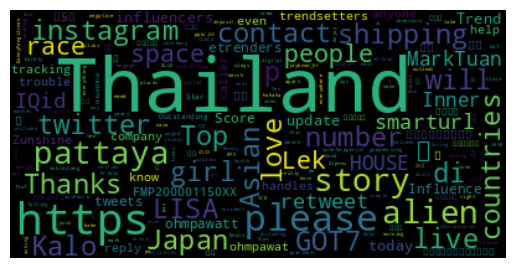

In [ ]:
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Note: ไม่ต้องรายงานส่วนนี้ในสไลด์

## Problem 2 Study Trip Advisor Hotel Reviews Sentiment

We are working with the Trip Advisor Hotel Reviews dataset. You can see the source from https://www.kaggle.com/datasets/andrewmvd/trip-advisor-hotel-reviews.

* Analyze the data to find out what make a hotel good or bad
<br>You may create a tag of "positive", "negative", or "neural" sentiment first. After tagging each tweet with different sentiment, we can separate positive tweets and negative tweets. Then, it is easier to find our common patterns in positive tweets or good hotels, and vice versa.

In [ ]:
#----------------------------------------------
# Your code starts here
# label each tweet as positive, negative, and neural sentiment
# combine tweet texts in each type
# tokenize texts
# convert to lower case
# remove stop words
# remove any other stop words, like RT
# remove punctuations
# remove other symbols?
# analyze word frequency in each sentiment type and so on
# create some data visualization for the analysis and your presentation





read CSV

In [ ]:
hotel = pd.read_csv('/content/drive/MyDrive/DataForBig/tripadvisor_hotel_reviews.csv')

In [ ]:
hotel

In [ ]:
#label each tweet as positive, negative, and neural sentiment

def grade_lable(Rating):
    if Rating > 3:
        return 'positive'
    elif Rating == 3 :
        return 'neural'
    else :
        return 'negative'



In [ ]:
hotel['lable'] = hotel['Rating'].apply(grade_lable)

In [ ]:
hotel

### Report
* How did you analyze the data?
* What did you find in the data? (please include figures or tables in the report, but no source code)

## Problem 3 Collect and Analyze Your Interesting Topic

* Select a topic that your group members are interested
* Gather url from at least 3 webpages
* Use urllib.request to retrieve data from webpage
* Clean and find intersting patterns and information
* Create a word cloud of your topic

In [ ]:
#----------------------------------------------
# Your code starts here




### Report
* What did you find out about your topic? (please include figures or tables in the report, but no source code)

# ☃️ The End of Project 1 ☃️